In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report
from matplotlib import pyplot as plt

In [134]:
data = pd.read_csv('Data/merged_yelp_inspections.csv', index_col = 'CAMIS')
data.head(5)

,Name,Rating,Popularity,Price,Categories,Reviews,url,Latitude,Longitude,DBA,BORO,CUISINE DESCRIPTION,GRADE DATE,SCORE,GRADE,VIO_COUNT,VIO_CODE_LIST,CRITICAL_COUNT
CAMIS,,,,,,,,,,,,,,,,,,
30075445,Morris Park Bake Shop,4.0,41,2,"Bakeries, Desserts",Hands down the BEST cannoli in the Business!! ...,https://www.yelp.com/biz/morris-park-bake-shop...,40.848390,-73.856010,MORRIS PARK BAKE SHOP,BRONX,Bakery,2018-05-11,5.0,A,2,"{'10F', '08C'}",0
30112340,Wendy's,2.0,36,1,"Fast Food, Burgers",Place has sick ass frostys. Bouta get some fri...,https://www.yelp.com/biz/wendys-brooklyn-4?adj...,40.662952,-73.961753,WENDY'S,BROOKLYN,Hamburgers,2019-03-04,13.0,A,3,"{'10F', '02G', '10B'}",1
30191841,D.J. Reynolds,3.5,99,2,"Irish, Pubs",Had dinner last night with a group of 14. Foo...,https://www.yelp.com/biz/d-j-reynolds-new-york...,40.767750,-73.984870,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,Irish,2018-05-16,12.0,A,3,"{'08A', '10F', '04L'}",1
40356483,Wilkens Fine Foods,3.5,37,2,Delis,I've been coming here for years since I've mov...,https://www.yelp.com/biz/wilkens-fine-foods-br...,40.619900,-73.906850,WILKEN'S FINE FOOD,BROOKLYN,Delicatessen,2018-05-10,13.0,A,2,"{'10F', '06C'}",1
40356731,Taste the Tropics USA,4.5,31,1,Ice Cream & Frozen Yogurt,The best ice cream shop by far and I have been...,https://www.yelp.com/biz/taste-the-tropics-usa...,40.640830,-73.948350,TASTE THE TROPICS ICE CREAM,BROOKLYN,"Ice Cream, Gelato, Yogurt, Ices",2018-05-16,13.0,A,4,"{'08A', '10F', '08C', '04L'}",1


In [135]:
data['Categories'].value_counts()

Chinese                                                          792
Pizza                                                            678
Coffee & Tea                                                     532
Donuts, Coffee & Tea                                             403
Mexican                                                          376
Italian                                                          337
Pizza, Italian                                                   309
Bakeries                                                         233
Sandwiches, Fast Food                                            194
Bars                                                             170
Caribbean                                                        157
Hotels                                                           153
Thai                                                             149
Japanese, Sushi Bars                                             145
American (New)                    

In [136]:
data['CUISINE DESCRIPTION'].value_counts()

American                                                            4321
Chinese                                                             1728
CafÃ©/Coffee/Tea                                                    1248
Pizza                                                                945
Italian                                                              820
Japanese                                                             699
Mexican                                                              663
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     585
Bakery                                                               569
Donuts                                                               488
Caribbean                                                            453
Chicken                                                              412
Pizza/Italian                                                        389
Spanish                                            

**Compared to 'Categories', column 'CUISINE DESCRIPTION' has less categories to encode with.**

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19086 entries, 30075445 to 50090040
Data columns (total 18 columns):
Name                   19086 non-null object
Rating                 19086 non-null float64
Popularity             19086 non-null int64
Price                  19086 non-null int64
Categories             19086 non-null object
Reviews                19086 non-null object
url                    19086 non-null object
Latitude               19086 non-null float64
Longitude              19086 non-null float64
DBA                    19086 non-null object
BORO                   19086 non-null object
CUISINE DESCRIPTION    19086 non-null object
GRADE DATE             19086 non-null object
SCORE                  19086 non-null float64
GRADE                  19086 non-null object
VIO_COUNT              19086 non-null int64
VIO_CODE_LIST          19086 non-null object
CRITICAL_COUNT         19086 non-null int64
dtypes: float64(4), int64(4), object(10)
memory usage: 2.8+ MB


In [138]:
data['Rating'].value_counts()

4.0    6715
3.5    4912
4.5    2621
3.0    2288
2.5    1213
2.0     783
1.5     276
5.0     206
1.0      72
Name: Rating, dtype: int64

In [139]:
data['Rating'] = data['Rating'].apply(lambda x: x*10)
data['Rating'] = data['Rating'].astype(int)
data['Rating'].value_counts()

40    6715
35    4912
45    2621
30    2288
25    1213
20     783
15     276
50     206
10      72
Name: Rating, dtype: int64

In [140]:
# Convert from float to integers for future models to read
# data['Rating'] = data['Rating'].astype(int)
data['SCORE'] = data['SCORE'].astype(int)
data['VIO_COUNT'] = data['VIO_COUNT'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19086 entries, 30075445 to 50090040
Data columns (total 18 columns):
Name                   19086 non-null object
Rating                 19086 non-null int64
Popularity             19086 non-null int64
Price                  19086 non-null int64
Categories             19086 non-null object
Reviews                19086 non-null object
url                    19086 non-null object
Latitude               19086 non-null float64
Longitude              19086 non-null float64
DBA                    19086 non-null object
BORO                   19086 non-null object
CUISINE DESCRIPTION    19086 non-null object
GRADE DATE             19086 non-null object
SCORE                  19086 non-null int64
GRADE                  19086 non-null object
VIO_COUNT              19086 non-null int64
VIO_CODE_LIST          19086 non-null object
CRITICAL_COUNT         19086 non-null int64
dtypes: float64(2), int64(6), object(10)
memory usage: 2.8+ MB


In [141]:
selected = data[['Rating','Popularity', 'Price', 'CUISINE DESCRIPTION', 'BORO', 'SCORE', 'GRADE', 'VIO_COUNT', 'CRITICAL_COUNT']]
selected.head(2)

,Rating,Popularity,Price,CUISINE DESCRIPTION,BORO,SCORE,GRADE,VIO_COUNT,CRITICAL_COUNT
CAMIS,,,,,,,,,
30075445,40,41,2,Bakery,BRONX,5,A,2,0
30112340,20,36,1,Hamburgers,BROOKLYN,13,A,3,1


## One Hot Encoding

In [142]:
# dummying the object columns
descrip = pd.get_dummies(selected['CUISINE DESCRIPTION'],drop_first=True)
boro = pd.get_dummies(selected['BORO'],drop_first=True)
grade = pd.get_dummies(selected['GRADE'],drop_first=True)

**From 2018-07-24, Yelp placed health inspection scores directly on a restaurant’s page on the user-generated review site.**

In [144]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19086 entries, 30075445 to 50090040
Data columns (total 9 columns):
Rating                 19086 non-null int64
Popularity             19086 non-null int64
Price                  19086 non-null int64
CUISINE DESCRIPTION    19086 non-null object
BORO                   19086 non-null object
SCORE                  19086 non-null int64
GRADE                  19086 non-null object
VIO_COUNT              19086 non-null int64
CRITICAL_COUNT         19086 non-null int64
dtypes: int64(6), object(3)
memory usage: 1.5+ MB


In [145]:
# drop the rest of the columns which are not needed.
selected_ = selected.drop(['CUISINE DESCRIPTION','BORO','GRADE'],axis=1)
selected_.columns

Index(['Rating', 'Popularity', 'Price', 'SCORE', 'VIO_COUNT',
       'CRITICAL_COUNT'],
      dtype='object')

In [146]:
# concatenate the new categorical columns to the dataframe
X = pd.concat([selected_, descrip, boro, grade],axis=1)

In [147]:
Y = selected_['Rating'].values

### Test Train Split

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### Training and Predicting

In [149]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [150]:
test_prediction = lr.predict(X_test)

### Evaluation

In [151]:
print(metrics.accuracy_score(Y_test, test_prediction))

0.6508801341156748


In [152]:
print(classification_report(Y_test, test_prediction))

              precision    recall  f1-score   support

          10       1.00      0.13      0.24        15
          15       0.96      0.36      0.52        73
          20       0.59      0.52      0.55       188
          25       0.58      0.11      0.18       327
          30       0.13      0.05      0.07       587
          35       0.50      0.61      0.55      1207
          40       0.74      0.99      0.85      1690
          45       0.91      0.80      0.85       636
          50       0.00      0.00      0.00        49

   micro avg       0.65      0.65      0.65      4772
   macro avg       0.60      0.40      0.42      4772
weighted avg       0.61      0.65      0.60      4772



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [153]:
weights = pd.Series(lr.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

Sandwiches                                                          1.291823e+00
Pizza                                                               1.214154e+00
Price                                                               1.189166e+00
Hamburgers                                                          9.769738e-01
Sandwiches/Salads/Mixed Buffet                                      8.897382e-01
Bagels/Pretzels                                                     8.816587e-01
VIO_COUNT                                                           5.780958e-01
American                                                            4.541504e-01
Delicatessen                                                        4.244783e-01
BROOKLYN                                                            3.971314e-01
CafÃ©/Coffee/Tea                                                    3.317807e-01
QUEENS                                                              2.158255e-01
Chicken                     

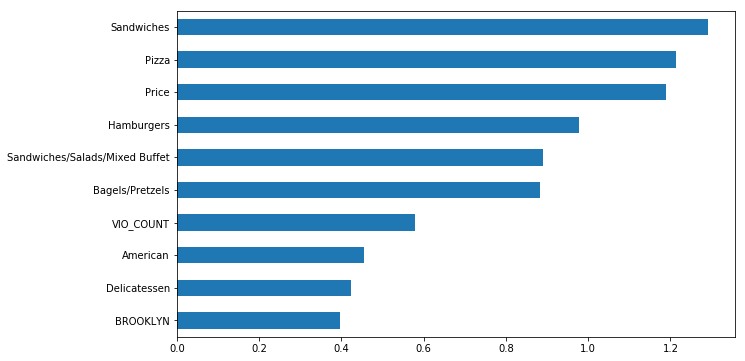

In [158]:
%matplotlib inline
plt.figure(figsize=(10,6))
weights.nlargest(10).plot(kind='barh').invert_yaxis()